In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
df = pd.read_csv('salary_data_cleaned.csv')

In [136]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_location,age,python,r_studio,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,tecolote research\n,NM,0,48,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,university of maryland medical system\n,MD,1,37,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,knowbe4\n,FL,1,11,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,pnnl\n,WA,1,56,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,affinity solutions\n,NY,1,23,1,0,0,0,1


In [137]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'per_hour', 'employer_provided', 'min_salary', 'max_salary',
       'avg_salary', 'company_txt', 'job_state', 'same_location', 'age',
       'python', 'r_studio', 'spark', 'aws', 'excel'],
      dtype='object')

In [138]:
def simplify_title(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data analyst' in title.lower():
        return 'data analyst'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [139]:
df['title_simp'] = df['Job Title'].apply(simplify_title)
df.title_simp.value_counts()

data scientist    279
na                187
data engineer     119
data analyst       99
manager            22
mle                22
director           14
Name: title_simp, dtype: int64

In [140]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [141]:
#Fix state Los Angeles
df['job_state'] = df['job_state'].apply(lambda x: x.strip() if x.strip() != 'Los Angeles' else 'CA')
df.job_state.value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
UT     10
IN     10
AZ      9
MO      9
AL      8
GA      6
DE      6
KY      6
MI      6
CT      5
IA      5
LA      4
OR      4
NE      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: job_state, dtype: int64

In [142]:
#Job description length
df['descrip_len'] = df['Job Description'].apply(lambda x: len(x))
df['descrip_len']

0       2536
1       4783
2       3461
3       3883
4       2728
5       3747
6       1786
7       3804
8       1538
9       4574
10      2757
11      3490
12      3934
13      4897
14      3731
15      1889
16      3639
17      4163
18      3512
19      4397
20      2918
21      6909
22      6408
23      2907
24      3760
25      3698
26      4420
27      4900
28      5015
29      3461
30      3883
31      3342
32      5045
33      2327
34      2161
35      1739
36      5000
37      3703
38      3555
39      1739
40      3053
41      1996
42      3833
43      3550
44      9120
45      3213
46      7286
47      3412
48      2682
49      2739
50      2915
51      4244
52      1629
53      4734
54      4448
55      3543
56      4203
57      5020
58      1786
59      3747
60      4804
61      1382
62      2933
63      4945
64      2493
65      1939
66      3081
67      8397
68      2306
69      2291
70      1886
71      2903
72      2653
73      4427
74      2609
75      4295
76      3405

In [143]:
#competitor count
df['comp_count'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)
df['comp_count']

0      0
1      0
2      0
3      3
4      3
5      3
6      0
7      0
8      0
9      2
10     0
11     0
12     3
13     0
14     3
15     0
16     3
17     0
18     0
19     0
20     3
21     0
22     0
23     0
24     3
25     0
26     0
27     0
28     0
29     0
30     3
31     0
32     0
33     0
34     3
35     0
36     1
37     0
38     0
39     0
40     3
41     0
42     0
43     3
44     3
45     0
46     3
47     0
48     3
49     3
50     0
51     3
52     0
53     3
54     0
55     0
56     3
57     2
58     0
59     3
60     0
61     0
62     0
63     3
64     3
65     0
66     0
67     4
68     0
69     0
70     0
71     0
72     0
73     3
74     3
75     0
76     0
77     0
78     0
79     3
80     0
81     0
82     3
83     3
84     0
85     0
86     3
87     0
88     0
89     0
90     0
91     3
92     0
93     0
94     0
95     3
96     3
97     3
98     3
99     0
100    0
101    3
102    3
103    3
104    3
105    0
106    3
107    0
108    3
109    3
110    2
1

In [144]:
#hourly wage to annual
df['min_salary'] = df.apply(lambda x: x['min_salary']*2 if x['per_hour'] == 1 else x['min_salary'], axis = 1)
df['max_salary'] = df.apply(lambda x: x['max_salary']*2 if x['per_hour'] == 1 else x['max_salary'], axis = 1)
df['avg_salary'] = df.apply(lambda x: x['avg_salary']*2 if x['per_hour'] == 1 else x['avg_salary'], axis = 1)

In [145]:
df['company_txt'] = df['company_txt'].apply(lambda x: x.replace('\n', ''))

In [146]:
df.describe()

,Rating,Founded,per_hour,employer_provided,min_salary,max_salary,avg_salary,same_location,age,python,r_studio,spark,aws,excel,descrip_len,comp_count
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,101.434636,0.680593,47.524259,0.528302,0.001348,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,37.546122,0.466561,53.839080,0.499535,0.036711,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,15.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,25.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,60.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,277.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


In [147]:
corr = df[['Rating', 'age', 'descrip_len', 'comp_count', 'avg_salary']].corr()
corr

,Rating,age,descrip_len,comp_count,avg_salary
Rating,1.000000,0.023162,-0.012281,0.027190,0.012517
age,0.023162,1.000000,0.164188,0.127482,0.021936
descrip_len,-0.012281,0.164188,1.000000,0.104620,0.070474
comp_count,0.027190,0.127482,0.104620,1.000000,0.083263
avg_salary,0.012517,0.021936,0.070474,0.083263,1.000000


<AxesSubplot:>

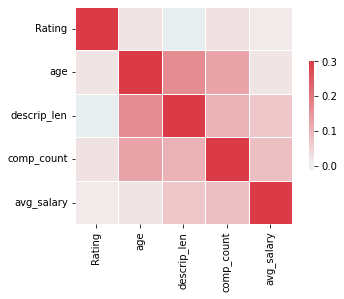

In [148]:
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap 
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [149]:
df[['Location', 'Headquarters']].columns

Index(['Location', 'Headquarters'], dtype='object')

In [150]:
df['Location'].value_counts()[:5]

New York, NY         55
San Francisco, CA    49
Cambridge, MA        47
Chicago, IL          32
Boston, MA           23
Name: Location, dtype: int64

graph for Location: total = 20


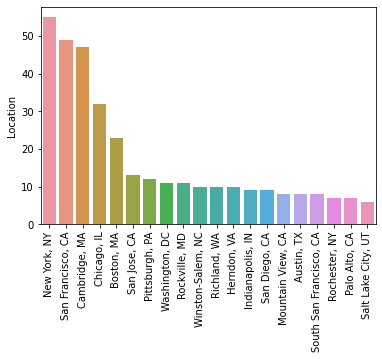

graph for Headquarters: total = 20


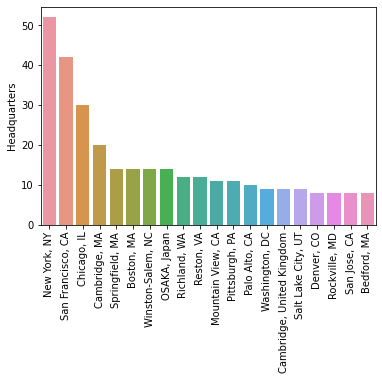

graph for company_txt: total = 20


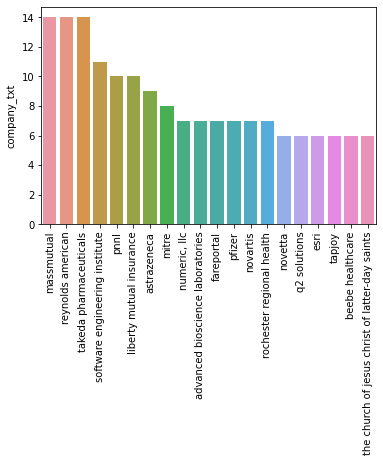

In [151]:
for i in df[['Location', 'Headquarters', 'company_txt']].columns:
    df_cat = df[i].value_counts()[:20]
    print('graph for %s: total = %d' % (i, len(df_cat)))
    plot = sns.barplot(x=df_cat.index, y=df_cat)
    plt.setp(plot.get_xticklabels(), rotation=90)
    plt.show()

In [152]:
pd.pivot_table(df, index='title_simp', values='avg_salary')

,avg_salary
title_simp,
data analyst,64.893939
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,88.267380


In [153]:
pd.pivot_table(df, index=['title_simp', 'seniority'], values='avg_salary')

avg_salary
title_simp     seniority            
data analyst   jr          56.500000
               na          60.812500
               senior      76.519231
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          78.422481
               senior     110.163793

In [154]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [155]:
pd.pivot_table(df, index=['job_state', 'title_simp'], values='avg_salary', aggfunc='count').sort_values('job_state', ascending=False)

avg_salary
job_state title_simp                
WI        na                       4
          data scientist           3
          data analyst             3
WA        na                       1
          data scientist          17
          data analyst             3
VA        na                       5
          mle                      2
          data scientist          18
          data engineer           10
          data analyst             6
UT        data engineer            3
          data analyst             4
          data scientist           3
TX        na                       7
          data scientist          13
          data engineer            8
TN        data scientist           1
          data engineer           10
          data analyst             2
SC        na                       1
RI        data analyst             1
PA        manager                  3
          data engineer            1
          data scientist           6
          data analyst             8
          mle                      7
          na                       8
OR        data scientist           3
          data engineer            1
OH        na                       4
          data scientist           7
          data analyst             3
NY        na                      12
          mle                      2
          data scientist          40
          data engineer            4
          data analyst            14
NM        data scientist           3
NJ        data scientist           4
          data analyst             5
          data engineer            2
          manager                  2
          director                 2
          na                       2
NE        na                       4
NC        na                      12
          data scientist           3
          data engineer            6
MO        na                       3
          manager                  1
          data scientist           3
          data analyst             2
MN        data engineer            1
          data analyst             1
MI        manager                  2
          data scientist           4
MD        na                      16
          data scientist          13
          data engineer            3
          data analyst             3
MA        na                      46
          manager                  5
          director                 6
          data scientist          30
          data engineer           12
          data analyst             4
LA        data analyst             1
          data engineer            2
          na                       1
KY        na                       4
          data scientist           2
KS        mle                      3
IN        na                       4
          data scientist           2
          data engineer            4
IL        data analyst             3
          na                       6
          mle                      2
          director                 6
          data scientist          15
          data engineer            8
ID        data analyst             2
IA        data analyst             2
          data engineer            3
GA        data scientist           3
          na                       3
FL        data scientist           7
          data engineer            3
          data analyst             6
DE        na                       6
DC        data scientist           5
          data engineer            4
          data analyst             2
CT        na                       3
          data scientist           2
CO        mle                      1
          data engineer            3
          data analyst             1
          na                       3
          data scientist           3
CA        na                      27
          mle                      5
          manager                  9
          data scientist          68
          data engineer           25
          data analyst        

In [156]:
pd.pivot_table(df[df['title_simp'] == 'data scientist'], index='job_state', values='avg_salary').sort_values('avg_salary', ascending=False)

,avg_salary
job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [157]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'per_hour', 'employer_provided', 'min_salary', 'max_salary',
       'avg_salary', 'company_txt', 'job_state', 'same_location', 'age',
       'python', 'r_studio', 'spark', 'aws', 'excel', 'title_simp',
       'seniority', 'descrip_len', 'comp_count'],
      dtype='object')

In [158]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'Type of ownership', 'same_location', 'per_hour', 'employer_provided',
    'age','python', 'r_studio', 'spark', 'aws', 'excel', 'company_txt', 'comp_count', 'avg_salary']]

In [159]:
for col in df_pivots.columns.drop('avg_salary'):
    print('\nAverage salary in %s' % (col))
    print(pd.pivot_table(df_pivots, index=col, values='avg_salary').sort_values('avg_salary', ascending=False))


Average salary in Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 4.0    107.170213
 3.2    106.928571
 3.7    105.680328
 3.5    104.897959
 4.7    103.983871
 3.3    103.897436
 4.3    102.468750
 4.2    100.442308
 2.2     97.750000
 3.8     97.418033
 4.6     97.250000
 2.1     95.900000
 3.4     93.465909
 3.6     89.945652
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 2.7     85.178571
 2.8     83.928571
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286

Average salary in Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
T

In [160]:
pd.pivot_table(df_pivots, index='Revenue', columns='python', values='avg_salary', aggfunc='count')

python,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [161]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

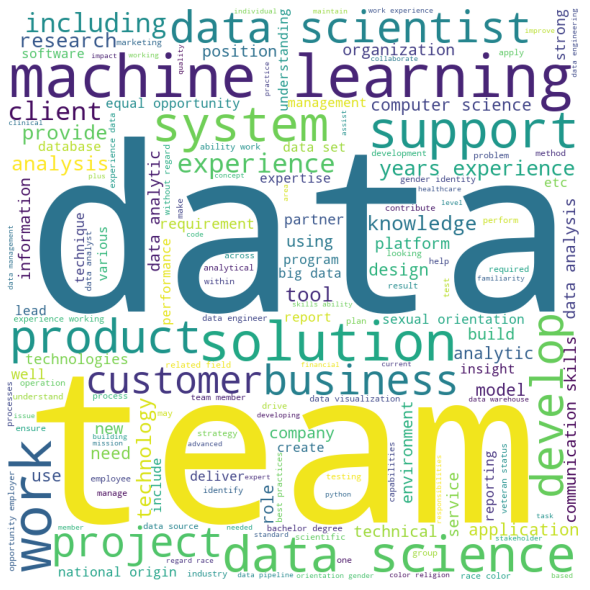

In [162]:
words = "".join(df['Job Description'])

def punctuation_stop(text):
    """Remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('English'))
    words_tokens = word_tokenize(text)
    for w in words_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = STOPWORDS,
                min_font_size = 10).generate(text)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()